<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/Transformadas_de_Laplace_no_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproduzindo tabela de transformadas de Laplace.

In [126]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing()

In [127]:
omega, a = sym.symbols('omega a', real=True)
exp = sym.exp
sin = sym.sin
cos = sym.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

⎡       -a⋅t     -a⋅t   2  -a⋅t                           -a⋅t   -a⋅t         
⎣1, t, ℯ    , t⋅ℯ    , t ⋅ℯ    , sin(ω⋅t), cos(ω⋅t), 1 - ℯ    , ℯ    ⋅sin(ω⋅t)

   -a⋅t         ⎤
, ℯ    ⋅cos(ω⋅t)⎦

In [128]:
def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)

Fs = [L(f) for f in functions]
Fs

⎡1  1     1       1         2         ω        s         1     1        ω     
⎢─, ──, ─────, ────────, ────────, ───────, ───────, - ───── + ─, ────────────
⎢s   2  a + s         2         3   2    2   2    2    a + s   s   2          
⎣   s          (a + s)   (a + s)   ω  + s   ω  + s                ω  + (a + s)

       a + s    ⎤
─, ─────────────⎥
2   2          2⎥
   ω  + (a + s) ⎦

# Avaliação direta

In [129]:
f = sym.exp(-t)
f

 -t
ℯ  

In [133]:
Fs, _, _ = sym.laplace_transform(f, t, s)
Fs

  1  
─────
s + 1

In [135]:
sym.inverse_laplace_transform(Fs, s, t)

 -t     
ℯ  ⋅θ(t)

# A função degrau unitário também conhecida como função degrau de Heaviside e é representada como θ(t) no Sympy.

In [136]:
sym.Heaviside(t) # Degrau aplicado no tempo t=0

θ(t)

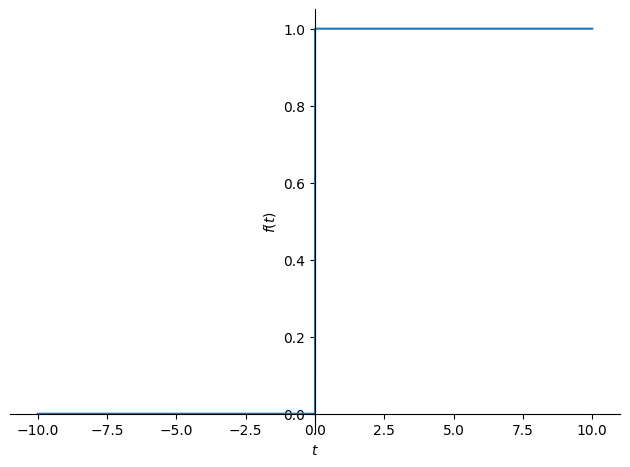

In [137]:
sym.plot(sym.Heaviside(t));

# Usando a bliblioteca Sympy para análise

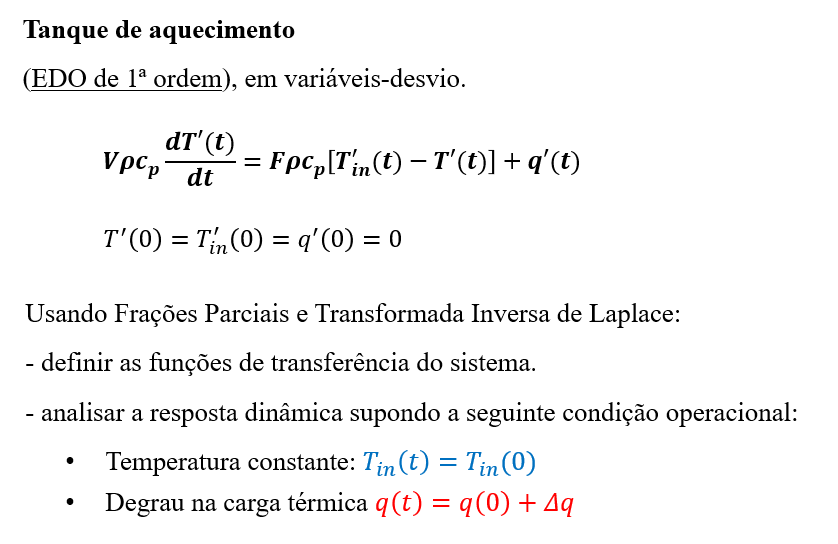

In [138]:


# Criando as variáveis simbólicas
t, tau, K1, K2, Delta_q = sym.symbols('t tau K1 K2 Delta_q', real=True)
s = sym.symbols('s', complex=True)

# Definindo as funções de transferência
G_1 = K1/(tau*s + 1) # efeito de T_in
G_2 = K2/(tau*s + 1) # efeito de q

# Visualizando as funções de transferência
(G_1, G_2)

⎛   K₁       K₂  ⎞
⎜───────, ───────⎟
⎝s⋅τ + 1  s⋅τ + 1⎠

In [139]:
# Definindo a perturbação degrau na carga térmica q
U, a, cond = sym.laplace_transform(Delta_q, t, s)
sym.simplify(U)

Δ_q
───
 s 

In [140]:
# Expressando a resposta do sistema
Ts = G_2 * U
Ts

   Δ_q⋅K₂  
───────────
s⋅(s⋅τ + 1)

In [141]:
# Calculando o valor final (em termos de variáveis-desvio)
T_final = sym.limit(s*Ts, s, 0)
T_final

Δ_q⋅K₂

In [142]:
# Expandindo T em frações parciais e
Tp = Ts.apart(s)
Tp

  Δ_q⋅K₂⋅τ   Δ_q⋅K₂
- ──────── + ──────
  s⋅τ + 1      s   

In [143]:
# Fazendo a transformada inversa de Laplace para voltar para o domínio do tempo
Tt = sym.inverse_laplace_transform(Tp, s, t)
Tt

                      -t      
                      ───     
                       τ      
Δ_q⋅K₂⋅θ(t) - Δ_q⋅K₂⋅ℯ   ⋅θ(t)

In [144]:
# Observando o comportamento gráfico ao longo do tempo
# supondo os parametros
K2 = 1.5; Delta_q = 1.0; tau = 2.0
Tt = Delta_q*K2*(1-sym.exp(-t/tau))
Tt

           -0.5⋅t
1.5 - 1.5⋅ℯ      

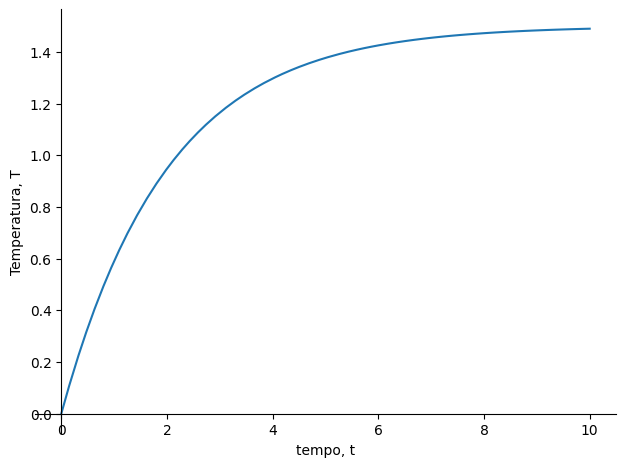

In [145]:
plot(Tt, (t, 0, 10),
     xlabel='tempo, t', ylabel='Temperatura, T');

# Inversas um pouco mais complicadas

In [146]:
Fs = 18/(s + 2) * 1/(s + 3)**2 * (1/s)
Fs

        18        
──────────────────
                 2
s⋅(s + 2)⋅(s + 3) 

In [147]:
Fp = Fs.apart(s)
Fp

  8        6         9     1
───── + ──────── - ───── + ─
s + 3          2   s + 2   s
        (s + 3)             

In [148]:
Ft = sym.inverse_laplace_transform(Fs, s, t)
Ft

     -3⋅t                  -2⋅t           -3⋅t     
6⋅t⋅ℯ    ⋅θ(t) + θ(t) - 9⋅ℯ    ⋅θ(t) + 8⋅ℯ    ⋅θ(t)

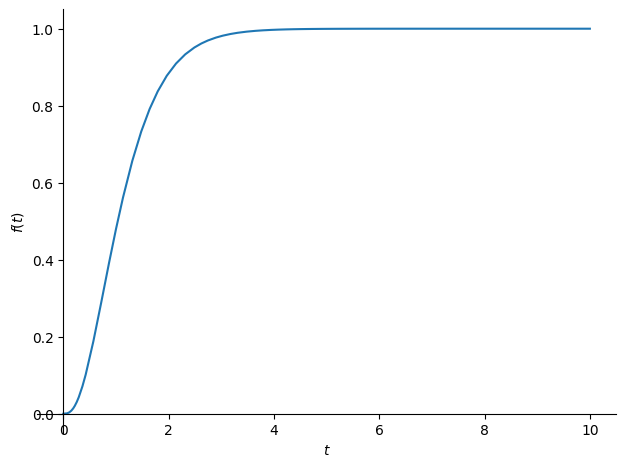

In [149]:
plot(Ft, (t, 0, 10))